In [ ]:
#MODULE 1    DATA COLLECTION AND UNDERSTANDING FOR SMART ENERGY ANALYSIS
#PROJECT SCOPE:
#The Smart Energy Consumption Analysis and Prediction System aims to analyze device-level electricity
#usage in a smart home environment using machine learning and deep learning techniques. 
#The system collects timestamped energy readings from various home appliances, processes the data,
#identifies consumption patterns, and predicts future energy usage. It also provides interactive
#visualizations, smart suggestions, and a web-based dashboard for monitoring energy usage in real time.
#The project focuses on improving energy efficiency, reducing electricity costs, and supporting sustainable 
#usage behavior.

#FUNCTIONAL OBJECTIVES:
#Collect and clean smart home energy data
#Analyze device-wise consumption
#Predict future usage using ML & LSTM


In [4]:
#importing pandas and loading dataset

import pandas as pd
df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")
df.head()


,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [2]:
#for checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   home_id       int64  
 1   timestamp     object 
 2   device_id     object 
 3   device_type   object 
 4   room          object 
 5   status        object 
 6   power_watt    float64
 7   user_present  int64  
 8   activity      object 
 9   indoor_temp   float64
 10  outdoor_temp  float64
 11  humidity      float64
 12  light_level   float64
 13  day_of_week   int64  
 14  hour_of_day   int64  
 15  price_kWh     int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 213.9+ MB


In [7]:
# df.isnull() checks each cell for missing values (True = missing, False = not missing)
df.isnull()

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# df.isnull().sum() counts the total number of missing (null) values in each column
df.isnull().sum()

home_id         0
timestamp       0
device_id       0
device_type     0
room            0
status          0
power_watt      0
user_present    0
activity        0
indoor_temp     0
outdoor_temp    0
humidity        0
light_level     0
day_of_week     0
hour_of_day     0
price_kWh       0
dtype: int64

In [9]:
df.columns

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [5]:
df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
mean,5.500000e+00,1.199867e+02,7.866553e-01,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,2.252036e+02,4.096692e-01,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,0.000000e+00,1.000000e+00,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,2.181600e+02,1.000000e+00,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03
max,1.000000e+01,3.482295e+03,1.000000e+00,4.320000e+01,4.120000e+01,1.000000e+02,1.000000e+03,6.000000e+00,2.300000e+01,3.000000e+03


In [7]:
#to check duplicated values (sum--counts how many duplicate rows are present in the dataset)
df.duplicated().sum()

np.int64(0)

In [9]:
#remove duplicates if any
df=df.drop_duplicates()

In [11]:
df.describe(include='all')

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1752000,1752000,1752000,1752000,1752000,1.752000e+06,1.752000e+06,1752000,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
unique,NaN,35040,50,5,4,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2022-12-31 19:45:00,air_conditioner1,air_conditioner,living_room,off,NaN,NaN,sleeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50,35040,350400,700800,1151365,NaN,NaN,582955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.500000e+00,NaN,NaN,NaN,NaN,NaN,1.199867e+02,7.866553e-01,NaN,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,NaN,NaN,NaN,NaN,NaN,2.252036e+02,4.096692e-01,NaN,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,NaN,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,NaN,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,NaN,NaN,NaN,NaN,NaN,2.181600e+02,1.000000e+00,NaN,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03


In [12]:
#check shape(size of dataset(rows,columns))
df.shape


(1752000, 16)

In [13]:
df.columns

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [15]:
df.dtypes

home_id           int64
timestamp        object
device_id        object
device_type      object
room             object
status           object
power_watt      float64
user_present      int64
activity         object
indoor_temp     float64
outdoor_temp    float64
humidity        float64
light_level     float64
day_of_week       int64
hour_of_day       int64
price_kWh         int64
dtype: object

In [16]:
#to see number of rows
df.shape[0]

1752000

In [17]:
#to see number of columns
df.shape[1]

16

In [18]:
#task4 finding outliers
#outlier=a value that is extremely high or low compared to other values


df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
mean,5.500000e+00,1.199867e+02,7.866553e-01,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,2.252036e+02,4.096692e-01,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,0.000000e+00,1.000000e+00,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,2.181600e+02,1.000000e+00,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03
max,1.000000e+01,3.482295e+03,1.000000e+00,4.320000e+01,4.120000e+01,1.000000e+02,1.000000e+03,6.000000e+00,2.300000e+01,3.000000e+03


In [19]:
#select only numeric columns
numeric_cols=df.select_dtypes(include=['float64','int64']).columns
numeric_cols

Index(['home_id', 'power_watt', 'user_present', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [20]:
#to check outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 100821
user_present → Number of outliers: 373780
indoor_temp → Number of outliers: 0
outdoor_temp → Number of outliers: 0
humidity → Number of outliers: 0
light_level → Number of outliers: 6400
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


In [21]:
#to remove outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [22]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 1486
user_present → Number of outliers: 0
indoor_temp → Number of outliers: 15208
outdoor_temp → Number of outliers: 16647
humidity → Number of outliers: 0
light_level → Number of outliers: 95477
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


In [23]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [24]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 0
user_present → Number of outliers: 0
indoor_temp → Number of outliers: 2934
outdoor_temp → Number of outliers: 1139
humidity → Number of outliers: 0
light_level → Number of outliers: 19913
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


In [25]:
#task5---summary statistics for all numeric columns
df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,947566.000000,947566.000000,947566.0,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000
mean,5.472551,81.511402,1.0,17.343399,17.345025,62.282717,56.191996,3.025549,10.812673,2016.819937
std,2.875604,123.222033,0.0,6.099641,5.997451,18.759503,37.309852,2.005203,8.715048,644.567654
min,1.000000,0.000000,1.0,2.200000,4.000000,26.500000,0.000000,0.000000,0.000000,1500.000000
25%,3.000000,0.000000,1.0,13.100000,13.100000,46.825000,26.700000,1.000000,3.000000,1500.000000
50%,5.000000,0.000000,1.0,16.800000,16.700000,61.400000,54.400000,3.000000,6.000000,1500.000000
75%,8.000000,200.620000,1.0,21.400000,21.400000,73.300000,80.700000,5.000000,20.000000,2500.000000
max,10.000000,500.876106,1.0,34.900000,34.100000,100.000000,176.900000,6.000000,23.000000,3000.000000


In [26]:
#summary statistics for categorical columns
df.describe(include='object')

,timestamp,device_id,device_type,room,status,activity
count,947566,947566,947566,947566,947566,947566
unique,20802,50,5,4,2,4
top,2022-12-31 17:45:00,light2,light,living_room,off,sleeping
freq,50,20298,199292,396522,633936,559736


In [27]:
#to check number of unique values in every column
df.nunique()

home_id            10
timestamp       20802
device_id          50
device_type         5
room                4
status              2
power_watt      35530
user_present        1
activity            4
indoor_temp       327
outdoor_temp      302
humidity          736
light_level      1271
day_of_week         7
hour_of_day        17
price_kWh           3
dtype: int64

In [29]:
df['room'].value_counts()

room
living_room     396522
kitchen         190756
laundry_room    181286
bedroom         179002
Name: count, dtype: int64

In [30]:
df['power_watt'].min()
df['power_watt'].max()

500.87610622881857

In [31]:
df['power_watt'].mean()
df['power_watt'].median()

0.0

In [32]:
df['power_watt'].describe()

count    947566.000000
mean         81.511402
std         123.222033
min           0.000000
25%           0.000000
50%           0.000000
75%         200.620000
max         500.876106
Name: power_watt, dtype: float64

In [33]:
df.corr(numeric_only=True)

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
home_id,1.000000,-0.000624,NaN,0.001405,0.001279,-0.000126,-0.011060,0.003435,-0.009550,-0.002806
power_watt,-0.000624,1.000000,NaN,0.081962,0.083256,-0.010671,-0.024047,-0.009238,0.195631,0.200388
user_present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indoor_temp,0.001405,0.081962,NaN,1.000000,0.981896,-0.418496,0.077326,-0.003775,0.231928,0.270820
outdoor_temp,0.001279,0.083256,NaN,0.981896,1.000000,-0.426418,0.078638,-0.003980,0.235781,0.275585
humidity,-0.000126,-0.010671,NaN,-0.418496,-0.426418,1.000000,-0.002563,-0.002105,-0.018154,-0.013757
light_level,-0.011060,-0.024047,NaN,0.077326,0.078638,-0.002563,1.000000,0.019240,-0.008976,0.151560
day_of_week,0.003435,-0.009238,NaN,-0.003775,-0.003980,-0.002105,0.019240,1.000000,0.003668,0.010014
hour_of_day,-0.009550,0.195631,NaN,0.231928,0.235781,-0.018154,-0.008976,0.003668,1.000000,0.517598
price_kWh,-0.002806,0.200388,NaN,0.270820,0.275585,-0.013757,0.151560,0.010014,0.517598,1.000000


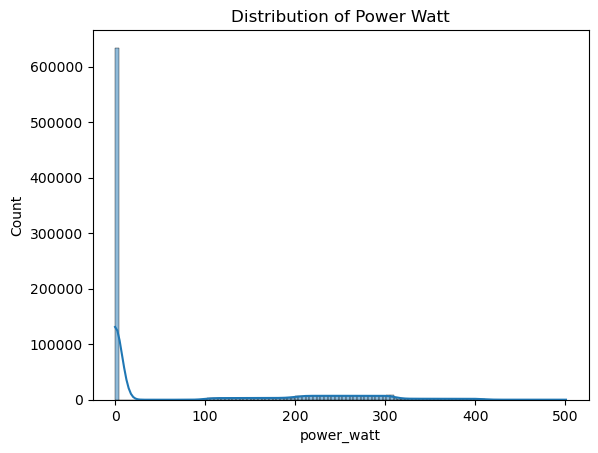

In [34]:
#histogram(distribution plot)shows how values of power_watt are distributed

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['power_watt'], kde=True)
plt.title("Distribution of Power Watt")
plt.show()

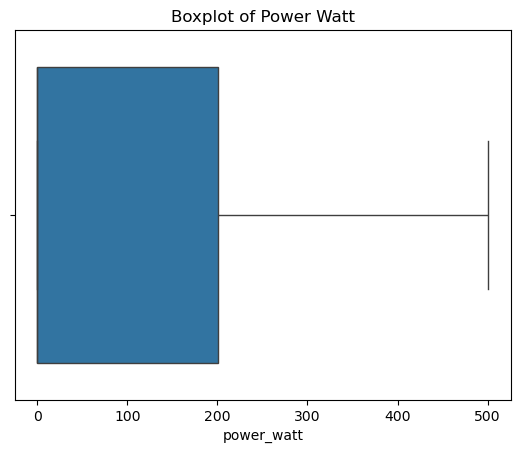

In [35]:
sns.boxplot(x=df['power_watt'])
plt.title("Boxplot of Power Watt")
plt.show()

In [37]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [39]:
df=df.sort_values(by=['timestamp','room','device_id'])

In [40]:
grouped = df.groupby(['room', 'device_id', 'device_type', 'timestamp']).sum()
grouped.head()

home_id status  \
room    device_id        device_type     timestamp                             
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00        1    off   
                                         2022-01-01 00:15:00        1    off   
                                         2022-01-01 00:30:00        1    off   
                                         2022-01-01 00:45:00        1    off   
                                         2022-01-01 01:15:00        1    off   

                                                              power_watt  \
room    device_id        device_type     timestamp                         
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         0.0   
                                         2022-01-01 00:15:00         0.0   
                                         2022-01-01 00:30:00         0.0   
                                         2022-01-01 00:45:00         0.0   
                                         2022-01-01 01:15:00         0.0   

                                                              user_present  \
room    device_id        device_type     timestamp                           
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00             1   
                                         2022-01-01 00:15:00             1   
                                         2022-01-01 00:30:00             1   
                                         2022-01-01 00:45:00             1   
                                         2022-01-01 01:15:00             1   

                                                              activity  \
room    device_id        device_type     timestamp                       
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00  sleeping   
                                         2022-01-01 00:15:00  sleeping   
                                         2022-01-01 00:30:00  sleeping   
                                         2022-01-01 00:45:00  sleeping   
                                         2022-01-01 01:15:00  sleeping   

                                                              indoor_temp  \
room    device_id        device_type     timestamp                          
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         11.4   
                                         2022-01-01 00:15:00         11.0   
                                         2022-01-01 00:30:00         10.2   
                                         2022-01-01 00:45:00         12.0   
                                         2022-01-01 01:15:00         12.8   

                                                              outdoor_temp  \
room    device_id        device_type     timestamp                           
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00          11.9   
                                         2022-01-01 00:15:00          11.7   
                                         2022-01-01 00:30:00          11.6   
                                         2022-01-01 00:45:00          11.7   
                                         2022-01-01 01:15:00          11.6   

                                                              humidity  \
room    device_id        device_type     timestamp                       
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00      45.2   
                                         2022-01-01 00:15:00      39.6   
                                         2022-01-01 00:30:00      58.6   
                                         2022-01-01 00:45:00      69.9   
                                         2022-01-01 01:15:00      37.5   

                                                              light_level  \
room    device_id        device_type     timestamp                          
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         73.4   
                                         2022-01-01 00:15:00     

In [13]:
df['timestamp']=pd.to_datetime(df['timestamp'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   home_id       int64         
 1   timestamp     datetime64[ns]
 2   device_id     object        
 3   device_type   object        
 4   room          object        
 5   status        object        
 6   power_watt    float64       
 7   user_present  int64         
 8   activity      object        
 9   indoor_temp   float64       
 10  outdoor_temp  float64       
 11  humidity      float64       
 12  light_level   float64       
 13  day_of_week   int64         
 14  hour_of_day   int64         
 15  price_kWh     int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 213.9+ MB


In [15]:
df['timestamp'].head()

0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: timestamp, dtype: datetime64[ns]

In [16]:
#sorting the dataset by timestamp
df=df.sort_values(by='timestamp')

In [17]:
#finding min and max timestamp
df['timestamp'].min(),df['timestamp'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-31 23:45:00'))

In [19]:
# Creating a full timestamp range with 15-minute intervals (change if needed)
full_range = pd.date_range(start=df['timestamp'].min(),
                           end=df['timestamp'].max(),
                           freq='15min')

In [20]:
#checking missing timestamps
missing_timestamps = len(full_range) - df['timestamp'].nunique()
missing_timestamps

0

In [21]:
#perform exploratory data analysis
#check dataset shape(number of rows and columns are in the dataset)
df.shape

(1752000, 16)

In [22]:
#summary statistics for numeric columns(df.describe() shows count,mean,min,max,std deviation) 
df.describe()

,home_id,timestamp,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1752000,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
mean,5.500000e+00,2022-07-02 11:52:29.999999232,1.199867e+02,7.866553e-01,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
min,1.000000e+00,2022-01-01 00:00:00,0.000000e+00,0.000000e+00,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,2022-04-02 05:56:15,0.000000e+00,1.000000e+00,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,2022-07-02 11:52:30,0.000000e+00,1.000000e+00,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,2022-10-01 17:48:45,2.181600e+02,1.000000e+00,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03
max,1.000000e+01,2022-12-31 23:45:00,3.482295e+03,1.000000e+00,4.320000e+01,4.120000e+01,1.000000e+02,1.000000e+03,6.000000e+00,2.300000e+01,3.000000e+03
std,2.872282e+00,NaN,2.252036e+02,4.096692e-01,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02


In [23]:
#shows all unique device types in the dataset
df['device_type'].unique()

array(['air_conditioner', 'tv', 'fridge', 'washer', 'light'], dtype=object)

In [24]:
#shows all unique room in the dataset
df['room'].unique()

array(['bedroom', 'living_room', 'kitchen', 'laundry_room'], dtype=object)

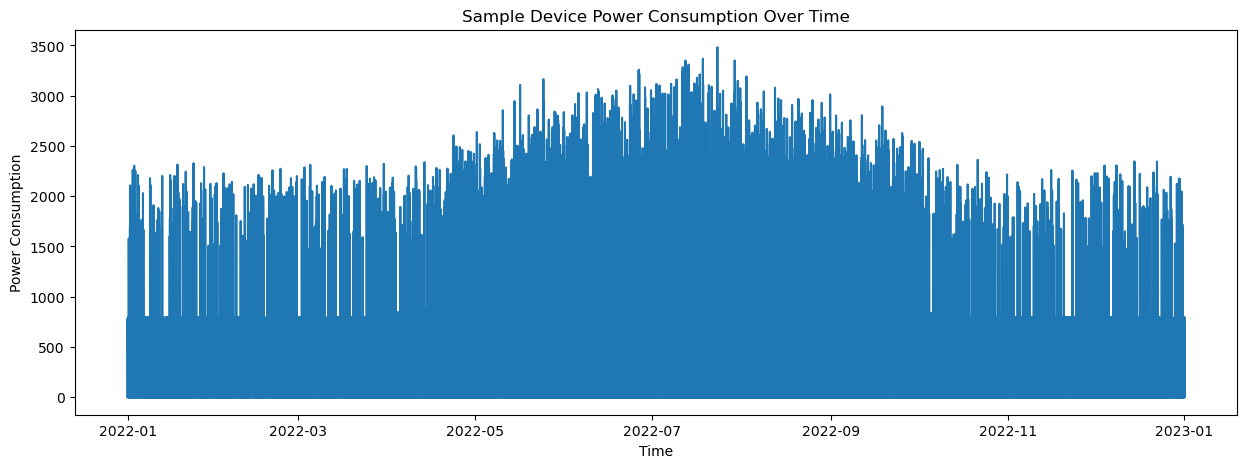

In [37]:
# Line plot of power over time for a sample device.
# Uses attributes: timestamp (x-axis) and power (y-axis).
# Helps see how a device's energy consumption changes over time.
import matplotlib.pyplot as plt

# Select one sample device
sample_device = df[df['device_type'] == df['device_type'].unique()[0]]

plt.figure(figsize=(15,5))
plt.plot(sample_device['timestamp'], sample_device['power_watt'])
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.title("Sample Device Power Consumption Over Time")
plt.show()

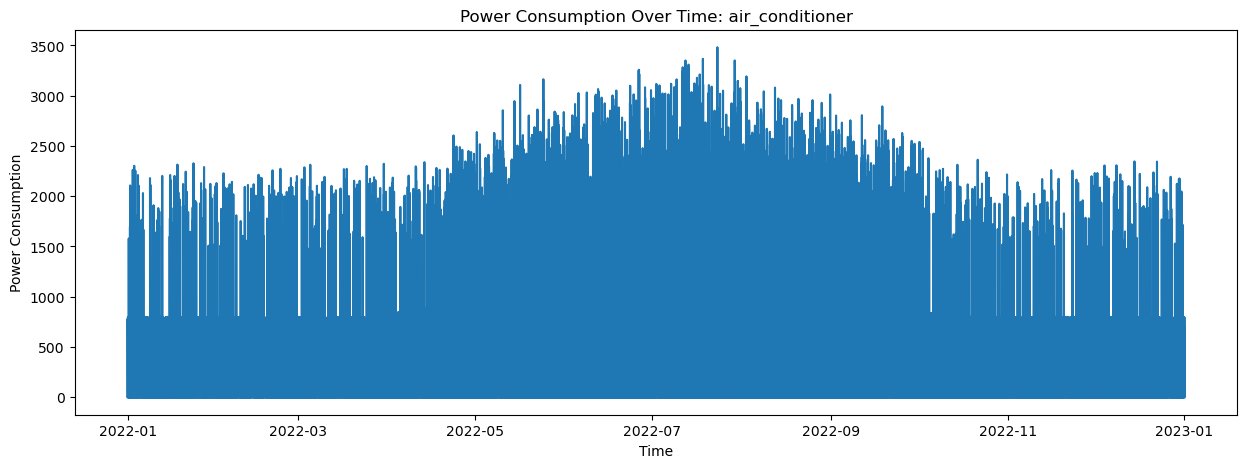

In [29]:


import matplotlib.pyplot as plt

# Select one sample device
sample_device = df[df['device_type'] == df['device_type'].unique()[0]]

plt.figure(figsize=(15,5))
plt.plot(sample_device['timestamp'], sample_device['power_watt'])
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.title(f"Power Consumption Over Time: {df['device_type'].unique()[0]}")
plt.show()

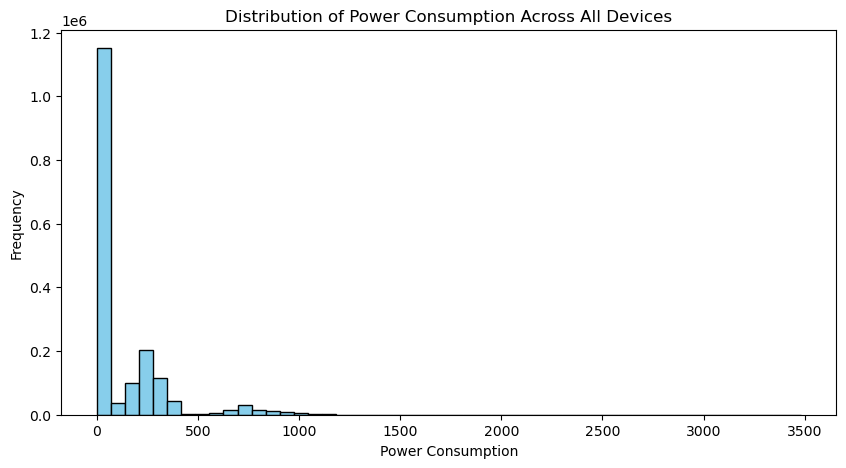

In [31]:
# Histogram of power_watt values.
# Uses the 'power_watt' attribute to show distribution of energy consumption.
# Helps understand how many readings fall into low, medium, or high usage.

plt.figure(figsize=(10,5))
plt.hist(df['power_watt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Power Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Power Consumption Across All Devices")
plt.show()

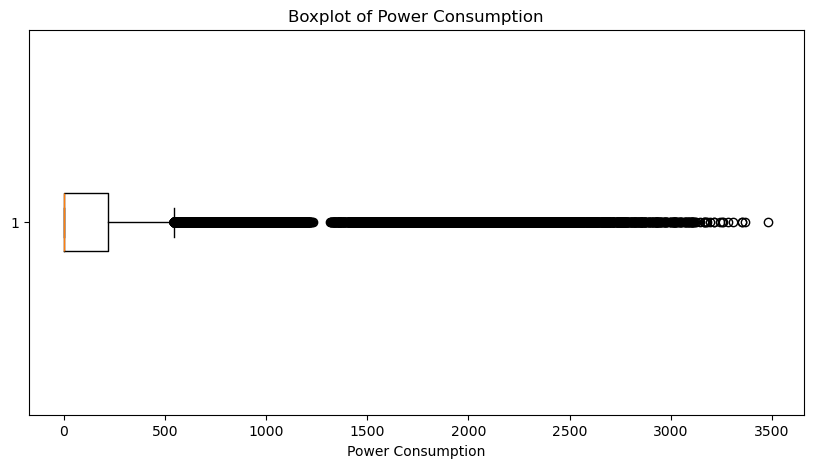

In [32]:
#Boxplot of power values.
# Uses the single attribute 'power_watt' to identify outliers and extremes.
# Helps detect abnormal spikes in energy usage.

plt.figure(figsize=(10,5))
plt.boxplot(df['power_watt'], vert=False)
plt.xlabel("Power Consumption")
plt.title("Boxplot of Power Consumption")
plt.show()

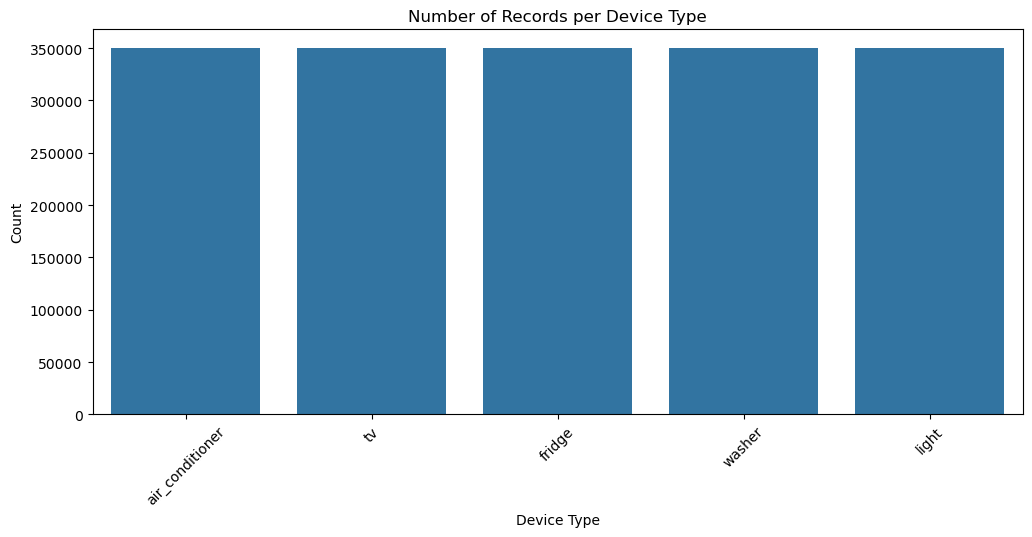

In [33]:
# Countplot of device types.
# Uses the 'device_type' attribute to show how many readings belong to each device.
# Helps identify the most frequently used devices in the dataset.


import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='device_type', data=df)
plt.xticks(rotation=45)
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.title("Number of Records per Device Type")
plt.show()

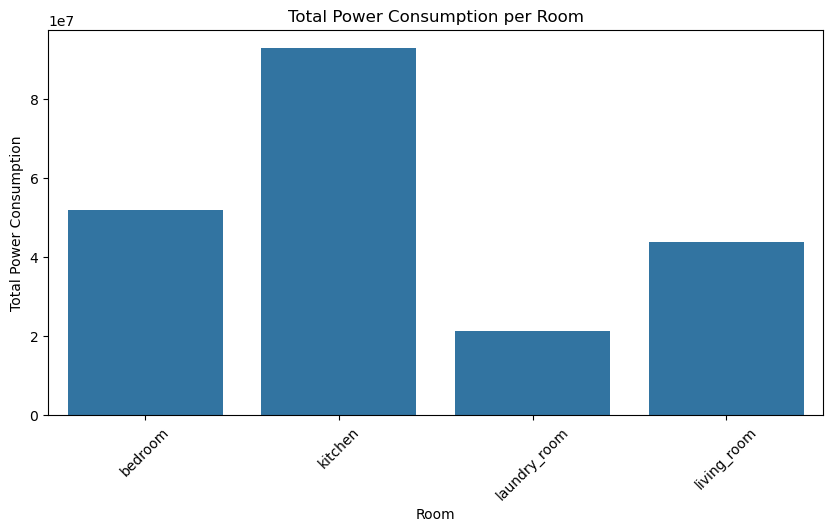

In [35]:
# Bar chart: Total power consumption by each room.
# Uses attributes: 'room' (grouping) and 'power' (sum of energy used).
# Helps understand which room consumes the most electricity.


room_power = df.groupby('room')['power_watt'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='room', y='power_watt', data=room_power)
plt.xticks(rotation=45)
plt.xlabel("Room")
plt.ylabel("Total Power Consumption")
plt.title("Total Power Consumption per Room")
plt.show()

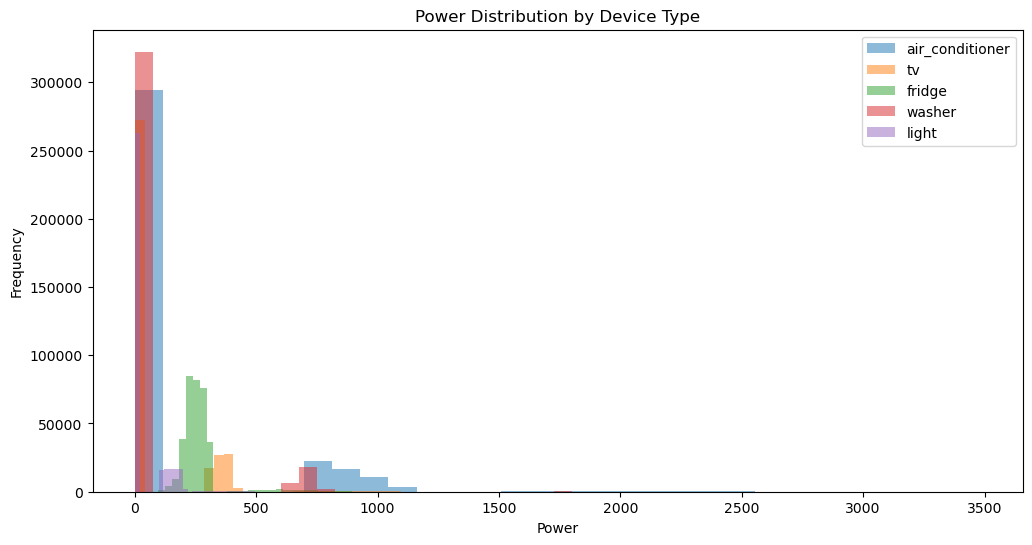

In [36]:
# Bar chart: Total power consumption by device type.
# Uses attributes: 'device_type' (grouping) and 'power' (sum of energy used).
# Helps identify which type of device is using the most electricity.

plt.figure(figsize=(12,6))
for device in df['device_type'].unique():
    subset = df[df['device_type'] == device]
    plt.hist(subset['power_watt'], bins=30, alpha=0.5, label=device)
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Power Distribution by Device Type")
plt.legend()
plt.show()

In [40]:
# Converting timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [39]:
# Extracting useful time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday

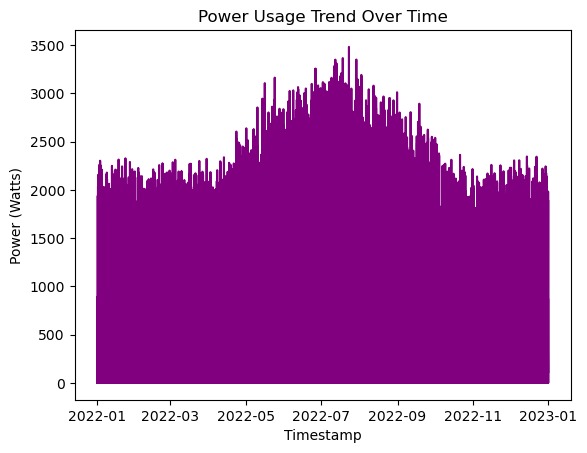

In [41]:
# Sorting by timestamp before plotting line graph
df_sorted = df.sort_values(by='timestamp')

# Line plot of power usage over time
plt.plot(df_sorted['timestamp'], df_sorted['power_watt'], color='purple')
plt.title("Power Usage Trend Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Power (Watts)")
plt.show()

C:\Users\manas\AppData\Local\Temp\ipykernel_25696\3643629954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_power['home_id'],


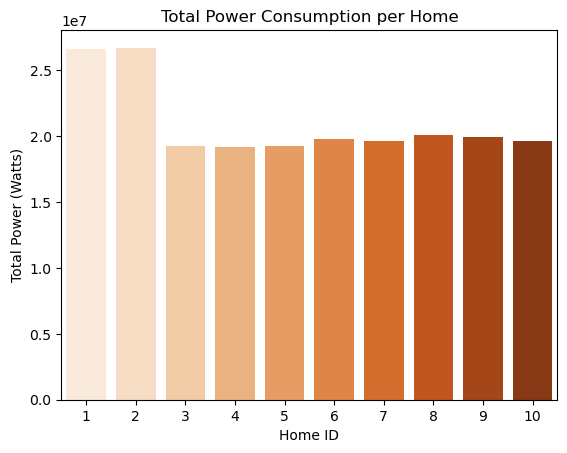

In [45]:
# Sum of power used in each home
home_power = df.groupby('home_id', as_index=False)[['power_watt']].sum()

# Plotting home vs total power consumption using explicit column names
sns.barplot(x=home_power['home_id'], 
            y=home_power['power_watt'], 
            palette='Oranges')

plt.title("Total Power Consumption per Home")
plt.xlabel("Home ID")
plt.ylabel("Total Power (Watts)")
plt.show()

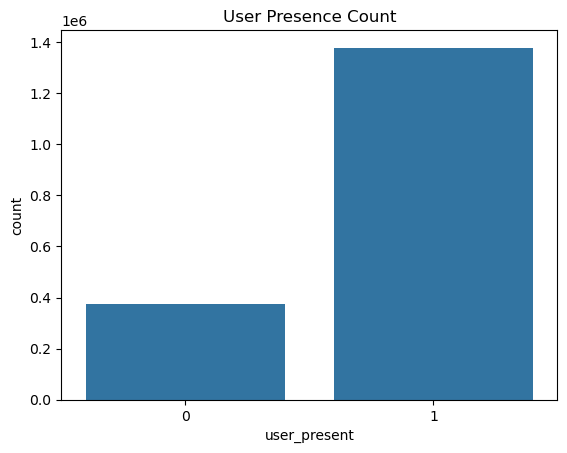

user_present
0     73.087699
1    132.705889
Name: power_watt, dtype: float64

In [43]:
# Count of user_present true/false
sns.countplot(data=df, x='user_present')
plt.title("User Presence Count")
plt.show()

# Average power when user present vs not present
df.groupby('user_present')['power_watt'].mean()

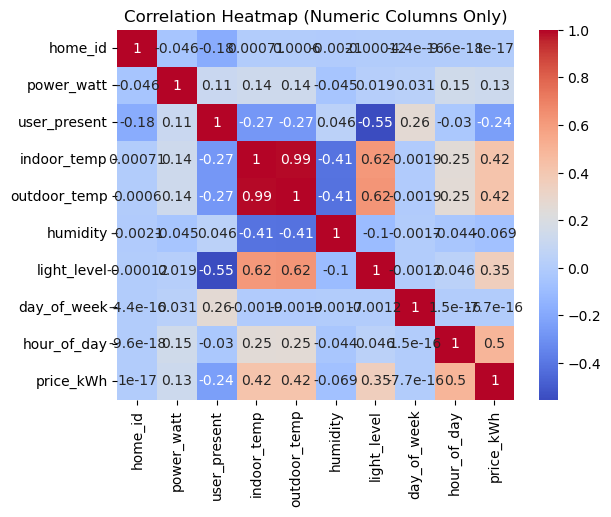

In [46]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
corr = numeric_df.corr()

# Plotting heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [47]:
# Organizing the dataset in chronological order
# Sorting dataset by timestamp to maintain chronological order.
# This ensures all time-series analysis works correctly.

df = df.sort_values(by='timestamp')

In [54]:
# Group energy readings for each device by time
# Helps analyze energy usage pattern of each device over time.

device_readings = df.groupby(['device_id', 'timestamp'])['power_watt'].sum().reset_index()
print(device_readings)

                device_id           timestamp  power_watt
0        air_conditioner1 2022-01-01 00:00:00        0.00
1        air_conditioner1 2022-01-01 00:15:00        0.00
2        air_conditioner1 2022-01-01 00:30:00        0.00
3        air_conditioner1 2022-01-01 00:45:00        0.00
4        air_conditioner1 2022-01-01 01:00:00      778.16
...                   ...                 ...         ...
1751995           washer9 2022-12-31 22:45:00      657.95
1751996           washer9 2022-12-31 23:00:00        0.00
1751997           washer9 2022-12-31 23:15:00        0.00
1751998           washer9 2022-12-31 23:30:00        0.00
1751999           washer9 2022-12-31 23:45:00        0.00

[1752000 rows x 3 columns]


In [52]:
# Total energy used in each room at each timestamp
# Helps understand which rooms consume the most energy and when.

room_readings = df.groupby(['room', 'timestamp'])['power_watt'].sum().reset_index()
room_readings.head()
print(room_readings)

               room           timestamp  power_watt
0           bedroom 2022-01-01 00:00:00        0.00
1           bedroom 2022-01-01 00:15:00        0.00
2           bedroom 2022-01-01 00:30:00        0.00
3           bedroom 2022-01-01 00:45:00      773.40
4           bedroom 2022-01-01 01:00:00      778.16
...             ...                 ...         ...
140155  living_room 2022-12-31 22:45:00     1358.03
140156  living_room 2022-12-31 23:00:00      519.56
140157  living_room 2022-12-31 23:15:00        0.00
140158  living_room 2022-12-31 23:30:00        0.00
140159  living_room 2022-12-31 23:45:00      130.65

[140160 rows x 3 columns]


In [53]:
# Combined view: which device in which room used what power at what time
# Provides a detailed structure for device-level insights within rooms.

device_room_readings = df.groupby(['room', 'device_type', 'timestamp'])['power_watt'].sum().reset_index()
print(device_room_readings)

               room      device_type           timestamp  power_watt
0           bedroom  air_conditioner 2022-01-01 00:00:00        0.00
1           bedroom  air_conditioner 2022-01-01 00:15:00        0.00
2           bedroom  air_conditioner 2022-01-01 00:30:00        0.00
3           bedroom  air_conditioner 2022-01-01 00:45:00      773.40
4           bedroom  air_conditioner 2022-01-01 01:00:00      778.16
...             ...              ...                 ...         ...
175195  living_room               tv 2022-12-31 22:45:00      747.51
175196  living_room               tv 2022-12-31 23:00:00      335.50
175197  living_room               tv 2022-12-31 23:15:00        0.00
175198  living_room               tv 2022-12-31 23:30:00        0.00
175199  living_room               tv 2022-12-31 23:45:00        0.00

[175200 rows x 4 columns]
